**Set Environment**

In [8]:
suppressMessages(suppressWarnings(source("config.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


**Check file size before import**

In [2]:
fpath = "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input*/chr17.bed"
system(paste("ls -lh", fpath), intern=TRUE)

[1] "-rw-r--r--. 1 kk319 root  35G Jul 19 00:25 /work/kk319/out/CombEffect_STARR/annotation_fragment/Input/chr17.bed" 
[2] "-rw-r--r--. 1 kk319 root 7.1G Jul 19 00:30 /work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/chr17.bed"
[3] "-rw-r--r--. 1 kk319 root 7.7G Jul 19 00:35 /work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/chr17.bed"
[4] "-rw-r--r--. 1 kk319 root 9.0G Jul 19 00:42 /work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/chr17.bed"
[5] "-rw-r--r--. 1 kk319 root 7.2G Jul 19 00:46 /work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/chr17.bed"
[6] "-rw-r--r--. 1 kk319 root 5.8G Jul 19 00:50 /work/kk319/out/CombEffect_STARR/annotation_fragment/Input5/chr17.bed"

```
- 35G  /work/kk319/out/CombEffect_STARR/annotation_fragment/Input/chr17.bed
- 7.1G /work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/chr17.bed
- 7.7G /work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/chr17.bed
- 9.0G /work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/chr17.bed
- 7.2G /work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/chr17.bed
- 5.8G /work/kk319/out/CombEffect_STARR/annotation_fragment/Input5/chr17.bed
```

## Import motif annotation data of chr17

In [3]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(), col_character(),
           col_double(), col_integer())
cnames = c("Chrom_Frag",  "Start_Frag",  "End_Frag",  "Count_Frag", 
           "Chrom_Motif", "Start_Motif", "End_Motif", "Motif", "Score", 
           "Overlap")

fpath = "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/chr17.bed"
dat_ann_inp1 = read_tsv(fpath, col_types=ctypes, col_names=cnames)

In [5]:
head(dat_ann_inp1)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_Motif,Start_Motif,End_Motif,Motif,Score,Overlap
chr17,201123,201925,1,chr17,201116,201126,NFKB/1,9.032800,3
chr17,201123,201925,1,chr17,201136,201152,MZF1,9.096700,16
chr17,201123,201925,1,chr17,201138,201148,NFKB/1,8.141300,10
chr17,201123,201925,1,chr17,201141,201154,SPDEF/1,4.421900,13
chr17,201123,201925,1,chr17,201145,201160,CENBP,9.366400,15
chr17,201123,201925,1,chr17,201150,201171,GRHL,7.965733,21


In [24]:
dat_inp = dat_ann_inp1
dat_inp = dat_inp %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag) %>% 
    summarize(
        Count_Motif  = n(),
        Weight_Motif = sum(Score)) 
dat_inp = dat_inp %>% mutate(
    Len_Frag =  End_Frag - Start_Frag,
    Loc      = (End_Frag + Start_Frag)/2)
head(dat_inp)

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag'. You can override using the `.groups` argument.


Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Count_Motif,Weight_Motif,Len_Frag,Loc
chr17,201123,201925,1,201,1632.777,802,201524.0
chr17,201160,201968,1,211,1725.391,808,201564.0
chr17,201202,202074,1,227,1865.101,872,201638.0
chr17,201259,202052,1,214,1763.602,793,201655.5
chr17,201366,202130,1,218,1802.615,764,201748.0
chr17,206174,207307,1,203,1608.620,1133,206740.5


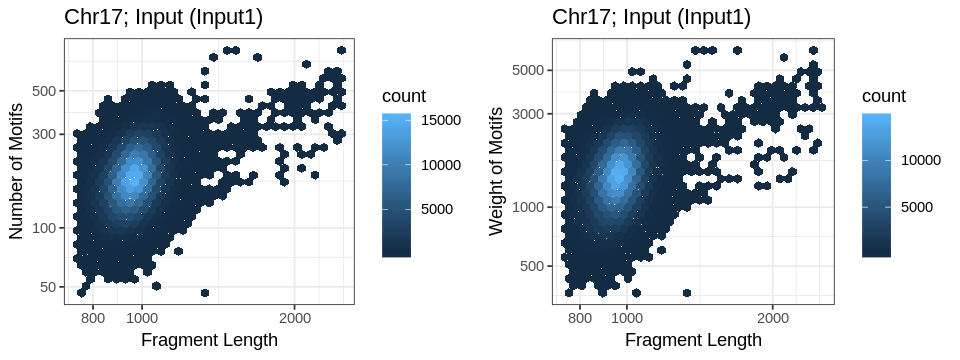

In [27]:
options(repr.plot.height=3, repr.plot.width=8)
dat = dat_inp
txt = "Chr17; Input (Input1)"

gp1 = ggplot(dat, aes(x=Len_Frag, y=Count_Motif)) + 
    geom_hex() + 
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Number of Motifs", title=txt)

gp2 = ggplot(dat, aes(x=Len_Frag, y=Weight_Motif)) + 
    geom_hex() +
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Weight of Motifs", title=txt)

grid.arrange(gp1, gp2, ncol=2)

In [20]:
dat = dat_inp
gp1 = ggplot(dat, aes(x=Len_Frag, y=Weight_Motif)) + 
    geom_point(alpha = 0.5) + 
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Weight of Motifs", title="Chr17; Input (Input1)")

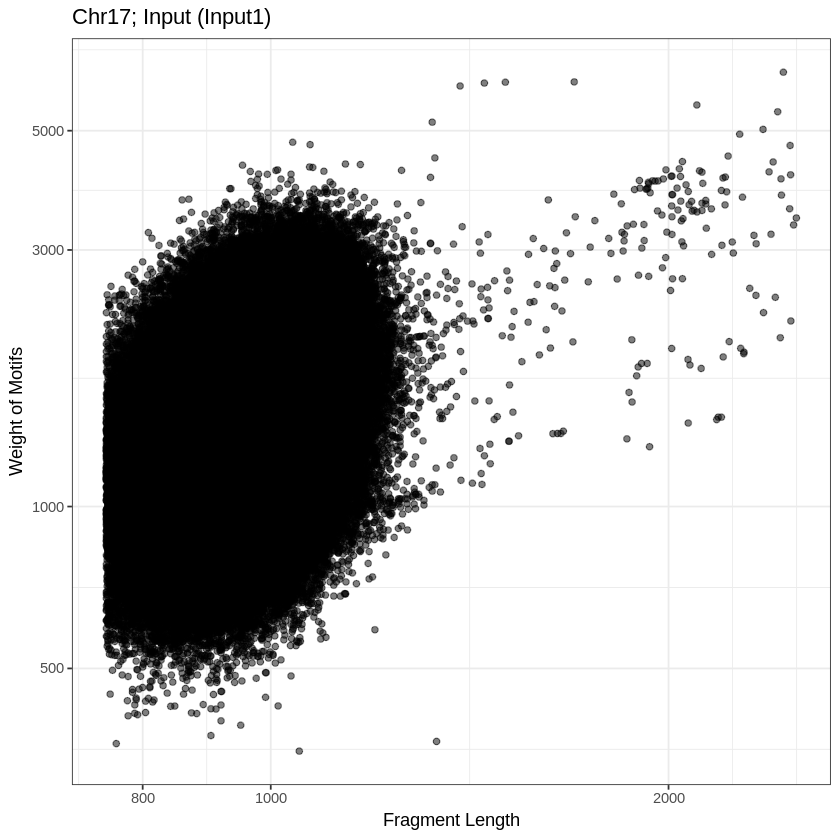

In [21]:
gp1

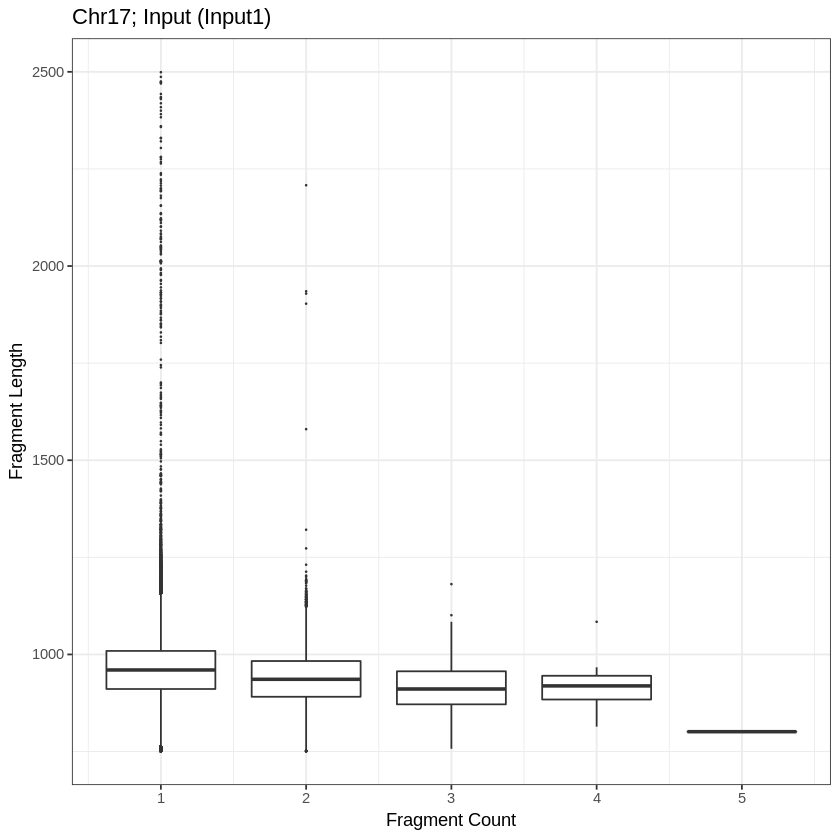

In [22]:
dat = dat_inp
gp1 = ggplot(dat, aes(x=Count_Frag, y=Len_Frag, group=Count_Frag)) + 
    geom_boxplot(outlier.size = 0.1) + 
    theme_bw() +
    labs(x="Fragment Count", y="Fragment Length", title="Chr17; Input (Input1)")
print(gp1)

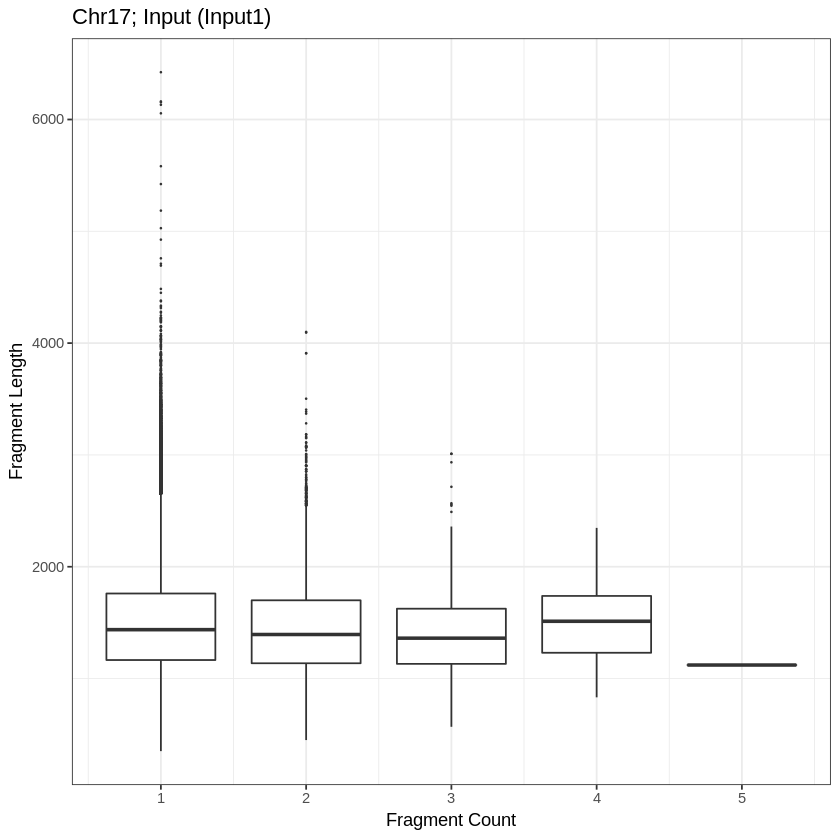

In [23]:
dat = dat_inp
gp1 = ggplot(dat, aes(x=Count_Frag, y=Weight_Motif, group=Count_Frag)) + 
    geom_boxplot(outlier.size = 0.1) + 
    theme_bw() +
    labs(x="Fragment Count", y="Fragment Length", title="Chr17; Input (Input1)")
print(gp1)

## Fragment Length vs Number of Motif

In [4]:
dat_inp = dat_ann_inp1
dat_inp = dat_inp %>% 
    group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag) %>% 
    summarize(Count_Motif = n())
dat_inp = dat_inp %>% mutate(
    Len_Frag =  End_Frag - Start_Frag,
    Loc      = (End_Frag + Start_Frag)/2)
head(dat_inp)

`summarise()` has grouped output by 'Chrom_Frag', 'Start_Frag', 'End_Frag'. You can override using the `.groups` argument.


Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Count_Motif,Len_Frag,Loc
chr17,201123,201925,1,201,802,201524.0
chr17,201160,201968,1,211,808,201564.0
chr17,201202,202074,1,227,872,201638.0
chr17,201259,202052,1,214,793,201655.5
chr17,201366,202130,1,218,764,201748.0
chr17,206174,207307,1,203,1133,206740.5


In [10]:
dat = dat_inp
gp1 = ggplot(dat, aes(x=Len_Frag, y=Count_Motif)) + 
    geom_point(alpha = 0.5) + 
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Number of Motifs", title="Chr17; Input (Input1)")

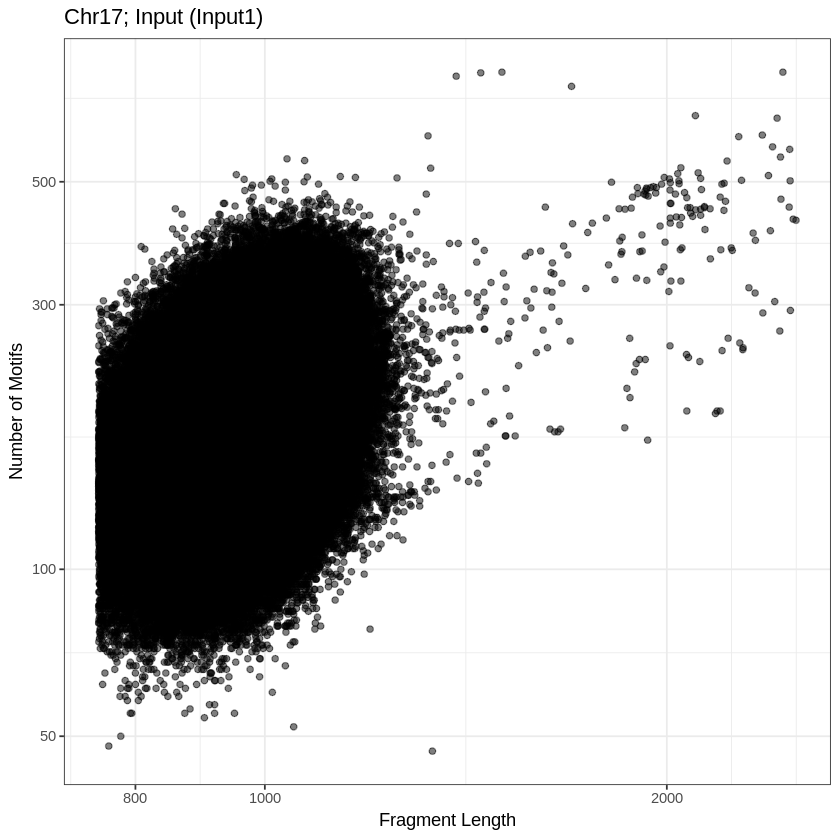

In [11]:
gp1

In [12]:
dat = dat_inp
gp2 = ggplot(dat, aes(x=Len_Frag, y=Count_Motif)) + 
    geom_hex() + 
    scale_x_log10() + 
    scale_y_log10() + 
    theme_bw() +
    labs(x="Fragment Length", y="Number of Motifs", title="Chr17; Input (Input1)")

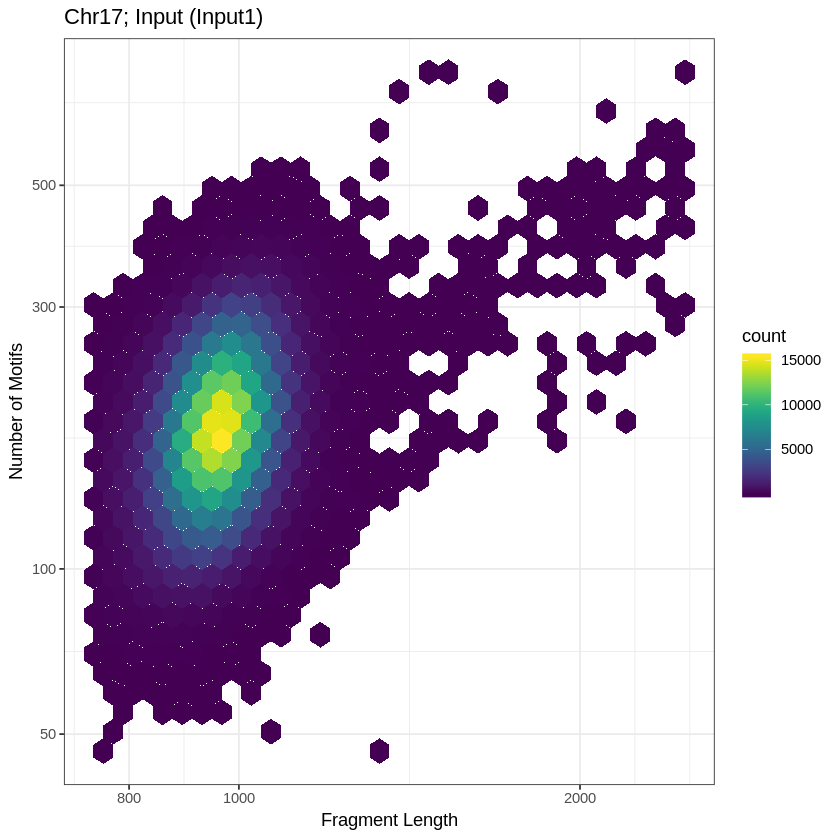

In [14]:
gp2 + scale_fill_viridis()